In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

data_raw = pd.read_csv('/home/marcel/catkin_ws/src/dynamic-model-car-simulator/data.csv')
data = pd.DataFrame(data=data_raw)
interest_a = 8990
interest_b = 9050
d = data[interest_a:interest_b] #19 30
n = 10   # granularity
#plt.plot(data['x'], data['t'])

#print('experiment end time: ' + repr(np.max(data['t'])) + 's')
d


,x,y,t,torque,steering_angle,long_vel,lat_vel,yaw_angle,yaw_rate,slip_angle_f,slip_angle_r,norm_load_f,norm_load_r,slip_angle_est_f,slip_angle_est_r,lat_for_f,lat_for_r
8990,8.49596,19.6926,89.90,0,0.0,0.249926,4.940656e-324,1.89987,0.0,-1.976263e-323,-1.976263e-323,6338.75,6338.75,-2.470328e-323,-2.470328e-323,-1.096134e-319,-1.096134e-319
8991,8.49515,19.6949,89.91,0,0.0,0.249926,4.940656e-324,1.89987,0.0,-1.976263e-323,-1.976263e-323,6338.75,6338.75,-2.470328e-323,-2.470328e-323,-1.096134e-319,-1.096134e-319
8992,8.49435,19.6973,89.92,0,0.0,0.249926,4.940656e-324,1.89987,0.0,-1.976263e-323,-1.976263e-323,6338.75,6338.75,-2.470328e-323,-2.470328e-323,-1.096134e-319,-1.096134e-319
8993,8.49354,19.6996,89.93,0,0.0,0.249926,4.940656e-324,1.89987,0.0,-1.976263e-323,-1.976263e-323,6338.75,6338.75,-2.470328e-323,-2.470328e-323,-1.096134e-319,-1.096134e-319
8994,8.49273,19.7020,89.94,0,0.0,0.249926,4.940656e-324,1.89987,0.0,-1.976263e-323,-1.976263e-323,6338.75,6338.75,-2.470328e-323,-2.470328e-323,-1.096134e-319,-1.096134e-319
8995,8.49192,19.7044,89.95,0,0.0,0.249926,4.940656e-324,1.89987,0.0,-1.976263e-323,-1.976263e-323,6338.75,6338.75,-2.470328e-323,-2.470328e-323,-1.096134e-319,-1.096134e-319
8996,8.49112,19.7067,89.96,0,0.0,0.249926,4.940656e-324,1.89987,0.0,-1.976263e-323,-1.976263e-323,6338.75,6338.75,-2.470328e-323,-2.470328e-323,-1.096134e-319,-1.096134e-319
8997,8.49031,19.7091,89.97,0,0.0,0.249926,4.940656e-324,1.89987,0.0,-1.976263e-323,-1.976263e-323,6338.75,6338.75,-2.470328e-323,-2.470328e-323,-1.096134e-319,-1.096134e-319
8998,8.48950,19.7115,89.98,0,0.0,0.249926,4.940656e-324,1.89987,0.0,-1.976263e-323,-1.976263e-323,6338.75,6338.75,-2.470328e-323,-2.470328e-323,-1.096134e-319,-1.096134e-319
8999,8.48869,19.7138,89.99,0,0.0,0.249926,4.940656e-324,1.89987,0.0,-1.976263e-323,-1.976263e-323,6338.75,6338.75,-2.470328e-323,-2.470328e-323,-1.096134e-319,-1.096134e-319


In [109]:
np.where(data['slip_angle_f'] == np.max(data['slip_angle_f']))

(array([2049, 2050]),)

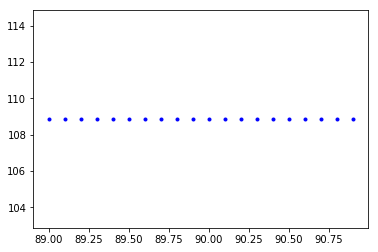

In [110]:
interest_a = 8900
interest_b = 9100
n = 10
yaw_clean = np.unwrap(data['yaw_angle'][interest_a:interest_b][::n])

plt.plot(data['t'][interest_a:interest_b][::n], np.rad2deg(yaw_clean) %360, '.b')

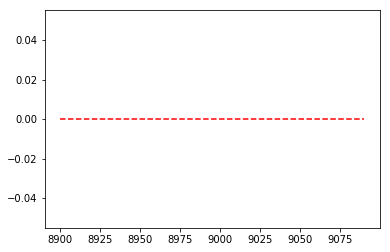

In [111]:
plt.plot(data['steering_angle'][interest_a:interest_b][::n], '--r')

In [112]:
torque = data['torque']
torque_n = sum(torque == np.max(torque))
torque_change_time = data['t'][torque_n]
torque_change_time
#np.arctan2(data['lat_for_f'][40000], data['lat_for_r'][40000])

20.0

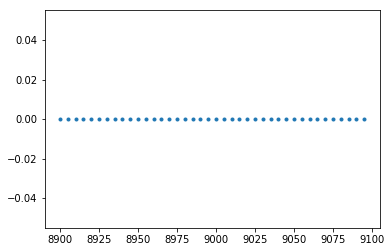

In [113]:
slip_angle = data['slip_angle_f']
plt.plot(slip_angle[interest_a:interest_b][::5], '.')

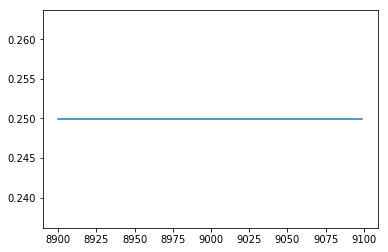

In [114]:
plt.plot(np.sqrt(data['long_vel'][interest_a:interest_b]**2 + data['lat_vel'][interest_a:interest_b]**2))

In [115]:
slip_angle[49000]

KeyError: 49000

In [ ]:
data_yaws = data['yaw_angle']
data_x = data['x']
data_y = data['y']
n = 200

x = data_x[::n]
y = data_y[::n]
u = np.cos(data_yaws)[::n]
v = np.sin(data_yaws)[::n]
#u = data['long_vel'][::100]
#v = data['lat_vel'][::100]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.quiver(x,y, u,v)
plt.plot()

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
n = 100
ax.plot(data['t'][::n], data['long_vel'][::n], '-.b', label='vx(t)')
ax.plot(data['t'][::n], data['lat_vel'][::n], '-.r', label='vy(t)')
leg = ax.legend();

In [ ]:


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plt.xlabel('x')
plt.ylabel('y')
plt.title('mapa 2D', fontsize=20)
#ax = plt.gca()
#ax.set_autoscale_on(False)

plt.plot(data['x'][interest_a:interest_b][::n], data['y'][interest_a:interest_b][::n])

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(data['t'], data['x'], torque_change_time, data['x'][torque_change_time], 'r*')
plt.title('x(t)', fontsize=20)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(data['t'], data['y'])
plt.title('y(t)', fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'][interest_a:interest_b][::n], data['norm_load_f'][interest_a:interest_b][::n], '--b', label='norm_load_f(t)')
ax.plot(data['t'][interest_a:interest_b][::n], data['norm_load_r'][interest_a:interest_b][::n], '--r', label='norm_load_r(t)')
leg = ax.legend();

In [ ]:
plt.plot(np.diff(slip_angle[interest_a:interest_b][::n]), '.')
